In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
transactions = pd.read_csv("Sampled_IEEE_data.csv")

In [75]:
transactions

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3387902,0,10106107,226.000,W,16075,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3134574,0,3026243,58.950,W,1675,174.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3532335,0,14399576,98.500,W,11207,361.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3158810,0,3710296,475.000,W,2803,100.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3336671,0,8625411,240.000,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3537855,0,14564125,57.950,W,6347,243.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3148288,0,3417666,159.950,W,6170,174.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3196850,0,4841895,58.950,W,3598,516.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3198368,0,4904885,59.000,W,12469,360.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3503512,0,13536667,47.950,W,4806,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
transactions.isFraud.value_counts(normalize=True)

0    0.96502
1    0.03498
Name: isFraud, dtype: float64

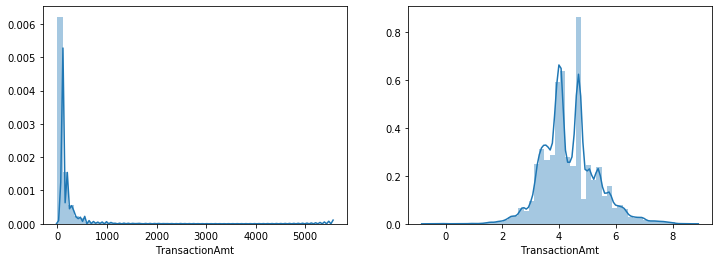

In [132]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))
sns.distplot(transactions["TransactionAmt"], ax=axes[0])
sns.distplot(np.log(transactions["TransactionAmt"]), ax=axes[1]);

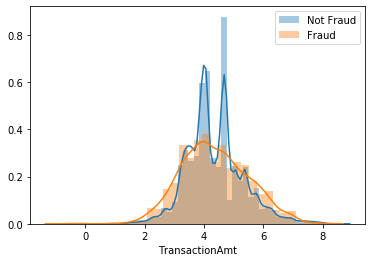

In [89]:
sns.distplot(np.log(transactions.loc[transactions["isFraud"] == 0]["TransactionAmt"]),
            label="Not Fraud")
sns.distplot(np.log(transactions.loc[transactions["isFraud"] == 1]["TransactionAmt"]),
            label="Fraud")
plt.legend();

In [82]:
many_null_cols = [col for col in transactions.columns
                  if (transactions[col].isna().sum() / transactions.shape[0]) > 0.7]

In [83]:
transactions = transactions.drop(many_null_cols, axis=1)
transactions

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,3387902,0,10106107,226.000,W,16075,514.0,150.0,mastercard,102.0,...,226.000000,226.000000,226.000000,226.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3134574,0,3026243,58.950,W,1675,174.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3532335,0,14399576,98.500,W,11207,361.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3158810,0,3710296,475.000,W,2803,100.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3336671,0,8625411,240.000,W,7826,481.0,150.0,mastercard,224.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,3537855,0,14564125,57.950,W,6347,243.0,150.0,visa,226.0,...,0.000000,57.950001,217.899994,57.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,3148288,0,3417666,159.950,W,6170,174.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,3196850,0,4841895,58.950,W,3598,516.0,150.0,mastercard,224.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,3198368,0,4904885,59.000,W,12469,360.0,150.0,mastercard,166.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,3503512,0,13536667,47.950,W,4806,490.0,150.0,visa,226.0,...,0.000000,0.000000,115.900002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [84]:
cat_cols = [col for col in transactions.columns
            if transactions[col].dtype == 'object']
cat_cols

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [11]:
useful_features = ['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
                   'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
                   'C14', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                   'V12', 'V13', 'V17', 'V19', 'V20', 'V29', 'V30', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V40', 'V44', 'V45',
                   'V46', 'V47', 'V48', 'V49', 'V51', 'V52', 'V53', 'V54', 'V56', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64',
                   'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V78', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V87',
                   'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128', 'V130', 'V131',
                   'V138', 'V139', 'V140', 'V143', 'V145', 'V146', 'V147', 'V149', 'V150', 'V151', 'V152', 'V154', 'V156', 'V158',
                   'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V169', 'V170', 'V171', 'V172', 'V173',
                   'V175', 'V176', 'V177', 'V178', 'V180', 'V182', 'V184', 'V187', 'V188', 'V189', 'V195', 'V197', 'V200', 'V201',
                   'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V212', 'V213', 'V214', 'V215', 'V216',
                   'V217', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V231', 'V233',
                   'V234', 'V238', 'V239', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V249', 'V251', 'V253', 'V256', 'V257',
                   'V258', 'V259', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V270', 'V271', 'V272', 'V273',
                   'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V282', 'V283', 'V285', 'V287', 'V288', 'V289', 'V291',
                   'V292', 'V294', 'V303', 'V304', 'V306', 'V307', 'V308', 'V310', 'V312', 'V313', 'V314', 'V315', 'V317', 'V322',
                   'V323', 'V324', 'V326', 'V329', 'V331', 'V332', 'V333', 'V335', 'V336', 'V338']

In [14]:
cols_to_drop = [col for col in transactions.columns if col not in useful_features]
cols_to_drop.remove('isFraud')

In [15]:
transactions = transactions.drop(cols_to_drop, axis=1)